In [59]:
%matplotlib inline
%load_ext autoreload
%autoreload 

import sys
sys.path.append(f'/home/beans/bespoke')
from constants import *

import matplotlib.pyplot as plt
from viz_utils import draw_wps
from blender_dataloader import *
from constants import *
from imports import *
from train_utils import get_torque

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
get_obs_per_sec()

(96.20647, 5.463686)

In [61]:
paths = glob.glob(f"{BLENDER_MEMBANK_ROOT}/**/obs_per_sec.npy", recursive=True)
obs_per_sec = np.array([np.load(p)[0] for p in paths])
obs_per_sec

array([ 9.344601 , 10.186881 ,  5.463686 ,  6.8929214, 13.706505 ,
        7.757367 ,  7.1521935,  6.1455374,  8.856777 ,  6.506031 ,
        8.30687  ,  5.8871017], dtype=float32)

In [62]:
dataloader = BlenderDataloader("trn", 6)

In [63]:
%%time
batch, is_first_in_seq = dataloader.get_batch()

(
    img, 
    aux_model,
    aux_calib,
    wp_angles,
    wp_headings,
    wp_curvatures,
    wp_rolls,
    wp_zs,
    aux_targets,
    to_pred_mask,
) = batch

is_first_in_seq

CPU times: user 576 µs, sys: 151 µs, total: 727 µs
Wall time: 939 µs


True

In [64]:
wp_angles.shape, wp_headings.shape, wp_curvatures.shape, wp_rolls.shape, wp_zs.shape

(torch.Size([6, 1, 30]),
 torch.Size([6, 1, 30]),
 torch.Size([6, 1, 30]),
 torch.Size([6, 1, 30]),
 torch.Size([6, 1, 30]))

In [65]:
aux_model.shape, aux_calib.shape, aux_targets.shape

(torch.Size([6, 1, 5]), torch.Size([6, 1, 4]), torch.Size([6, 1, 12]))

(array([ 1.,  1.,  3.,  5., 14., 44., 36., 34., 13., 29.]),
 array([-2.549  , -2.242  , -1.935  , -1.627  , -1.32   , -1.013  ,
        -0.7056 , -0.3987 , -0.09143,  0.2158 ,  0.523  ], dtype=float16),
 <BarContainer object of 10 artists>)

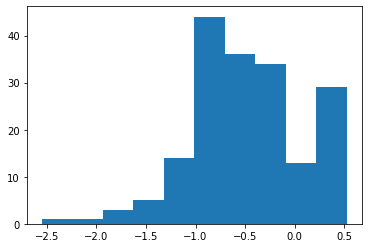

In [66]:
# Angles
plt.hist((wp_angles*to_pred_mask).flatten().detach().cpu().numpy())

(array([ 2.,  0.,  1.,  4., 12., 48., 27., 44., 14., 28.]),
 array([-2.643 , -2.33  , -2.018 , -1.704 , -1.392 , -1.079 , -0.7666,
        -0.4536, -0.141 ,  0.1716,  0.4844], dtype=float16),
 <BarContainer object of 10 artists>)

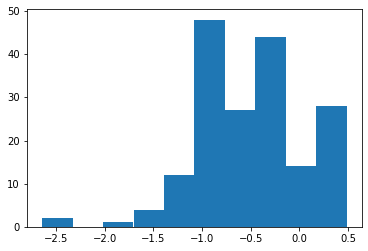

In [67]:
# headings
plt.hist((wp_headings*to_pred_mask).flatten().detach().cpu().numpy())

(array([ 9.,  4.,  6., 25.,  2., 33., 38., 26., 15., 22.]),
 array([-2.73  , -2.404 , -2.078 , -1.752 , -1.426 , -1.1   , -0.773 ,
        -0.4465, -0.1203,  0.2059,  0.532 ], dtype=float16),
 <BarContainer object of 10 artists>)

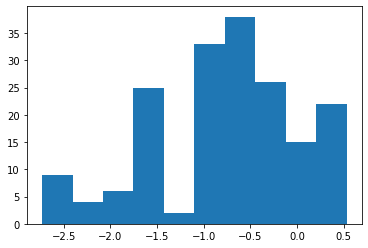

In [68]:
# curvatures
plt.hist((wp_curvatures*to_pred_mask).flatten().detach().cpu().numpy())

(array([ 20.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   1., 156.]),
 array([-2.553 , -2.297 , -2.043 , -1.787 , -1.531 , -1.276 , -1.021 ,
        -0.7656, -0.5107, -0.2554,  0.    ], dtype=float16),
 <BarContainer object of 10 artists>)

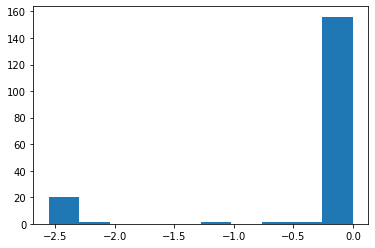

In [69]:
# rolls
plt.hist((wp_rolls*to_pred_mask).flatten().detach().cpu().numpy())

(array([ 3.,  6., 28., 76., 31., 21.,  5.,  5.,  2.,  3.]),
 array([-0.3179, -0.2363, -0.1547, -0.0731,  0.0085,  0.0901,  0.1716,
         0.2532,  0.335 ,  0.4165,  0.498 ], dtype=float16),
 <BarContainer object of 10 artists>)

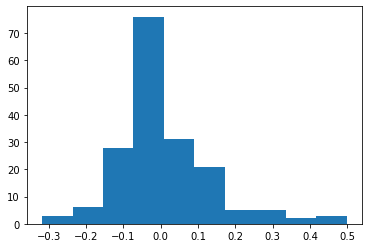

In [70]:
# zs
plt.hist((wp_zs*to_pred_mask).flatten().detach().cpu().numpy())

In [71]:
to_pred_mask.sum() / to_pred_mask.numel()

tensor(0.9229, device='cuda:0', dtype=torch.float16)

(array([0., 0., 0., 0., 0., 6., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5],
       dtype=float16),
 <BarContainer object of 10 artists>)

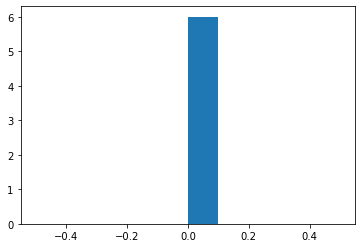

In [72]:
# Has stop
plt.hist(aux_targets[:,:,0].flatten().detach().cpu().numpy())

(array([0., 0., 0., 0., 0., 6., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5],
       dtype=float16),
 <BarContainer object of 10 artists>)

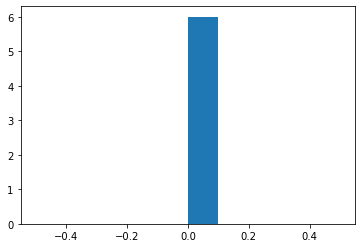

In [73]:
# Stop dist
plt.hist((aux_targets[:,:,1]*aux_targets[:,:,0]).flatten().detach().cpu().numpy())

(array([4., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float16),
 <BarContainer object of 10 artists>)

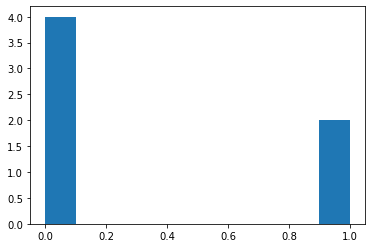

In [74]:
# has lead
plt.hist(aux_targets[:,:,3].flatten().detach().cpu().numpy())

(array([4., 0., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([0.    , 0.3022, 0.6045, 0.907 , 1.209 , 1.512 , 1.814 , 2.117 ,
        2.418 , 2.72  , 3.023 ], dtype=float16),
 <BarContainer object of 10 artists>)

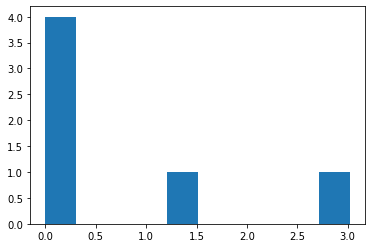

In [75]:
# lead dist
plt.hist((aux_targets[:,:,4]*aux_targets[:,:,3]).flatten().detach().cpu().numpy())

(array([1., 0., 0., 0., 0., 0., 0., 1., 0., 4.]),
 array([-7.188 , -6.47  , -5.75  , -5.03  , -4.312 , -3.594 , -2.875 ,
        -2.156 , -1.4375, -0.7188,  0.    ], dtype=float16),
 <BarContainer object of 10 artists>)

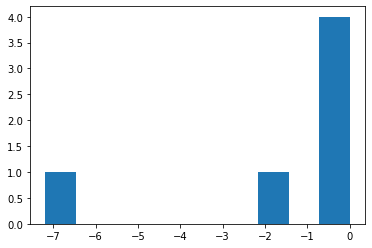

In [76]:
# lead speed
plt.hist((aux_targets[:,:,5]*aux_targets[:,:,3]).flatten().detach().cpu().numpy())

In [77]:
from models import *
m = EffNet().to(device) 
#model_stem = "12.10_e45"
#m.load_state_dict(torch.load(f"{BESPOKE_ROOT}/models/m_{model_stem}.torch"), strict=False)

In [109]:
%%time
with torch.no_grad():
    with torch.cuda.amp.autocast(): 
        wps_preds, aux_preds, obs_net_out  = m(img, aux_model, aux_calib)

CPU times: user 26.1 ms, sys: 74 µs, total: 26.2 ms
Wall time: 25.4 ms


In [79]:
backbone = timm.create_model("efficientnet_b4", pretrained=True, in_chans=N_CHANNELS).to(device).half()

In [102]:
_img = torch.randn((1,6,IMG_HEIGHT,IMG_WIDTH)).to("cuda").half()

In [103]:
%%timeit

bs, seq_len, c, h, w = img.shape
with torch.no_grad():
    with torch.cuda.amp.autocast(): 
        o = backbone(_img[:1])

17.3 ms ± 17.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [104]:
backbone_traced = torch.jit.trace(backbone, _img[0:1])

In [105]:
%%timeit

bs, seq_len, c, h, w = img.shape
with torch.no_grad():
    with torch.cuda.amp.autocast(): 
        o = backbone_traced(_img[:1])

11.8 ms ± 39 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
wp_angles_pred, wp_headings_pred, wp_curvatures_pred, wp_rolls_pred, wp_zs_pred = torch.chunk(wps_preds, 5, -1)

In [ ]:
aux_preds.shape

In [ ]:
sigmoid = torch.nn.Sigmoid()

In [ ]:
aux_preds[0,:,0], sigmoid(aux_preds[0,:,0])

In [18]:
t = get_torque(wp_angles, aux)
plt.hist(t.cpu().numpy().flatten())

NameError: name 'aux' is not defined

In [17]:
abs(t).max()

tensor(12240.8799, device='cuda:0')

(array([10., 19., 12.,  1.,  1.,  2.,  1.,  1.,  0.,  1.]),
 array([   2.3530273,  102.832375 ,  203.31172  ,  303.79108  ,
         404.27042  ,  504.74976  ,  605.2291   ,  705.70844  ,
         806.1878   ,  906.6671   , 1007.1465   ], dtype=float32),
 <BarContainer object of 10 artists>)

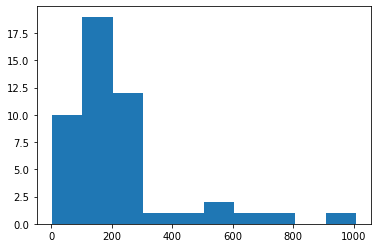

In [18]:
td = abs(t[:,1:,:] - t[:,:-1,:])
plt.hist(td.cpu().numpy().flatten())

In [19]:
abs(td).max()

tensor(1007.1465, device='cuda:0')

In [8]:
import subprocess

In [9]:
# Load up membank from ssd to shm
subprocess.run("cp -R /media/beans/beans_data/blender_membank /dev/shm/blender_membank", shell=True)

CompletedProcess(args='cp -R /media/beans/beans_data/blender_membank /dev/shm/blender_membank', returncode=0)

In [ ]:
# save membank to ssd
subprocess.run("cp -R /dev/shm/blender_membank /media/beans/beans_data/blender_membank", shell=True)